In [1]:
from sklearn.model_selection import train_test_split
from joblib import parallel_backend
from ray.util.joblib import register_ray
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import time
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import LancasterStemmer
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.adapt import BRkNNaClassifier,BRkNNbClassifier
from sklearn.multioutput import RegressorChain
from mlxtend.classifier import StackingClassifier
import joblib
from scipy.sparse import hstack
import ipyparallel as ipp

In [2]:
filpkart_watch=pd.read_csv('flipkart_watch.csv')
filpkart_tablet=pd.read_csv('flipkart_tablet.csv')
filpkart_laptop=pd.read_csv('flipkart_laptop.csv')
filpkart_phone=pd.read_csv('flipkart_phone.csv')
filpkart_TV=pd.read_csv('flipkart_TV.csv')
amazon_watch=pd.read_csv('amazon_watch.csv')
amazon_tablet=pd.read_csv('amazon_power_bank.csv')
amazon_earphone=pd.read_csv('amazon_earphone.csv')
amazon_phone=pd.read_csv('amazon_phone.csv')
amazon_TV=pd.read_csv('amazon_TV.csv')
dataa = pd.concat([filpkart_watch,filpkart_tablet,filpkart_laptop,filpkart_TV,filpkart_phone,
                  amazon_watch,amazon_tablet,amazon_earphone,amazon_TV,amazon_phone], axis=0)
dataa

comments  rating
0                      Terrific purchase       5
1                     Highly recommended       5
2                              Just wow!       5
3                      Worth every penny       5
4                              Must buy!       5
...                                  ...     ...
12495         Selfie camera is very poor       1
12496               Review after 1 month       1
12497      Charger USB cable not working       1
12498  Disoppointed with product quality       1
12499                     Bad experience       1

[125000 rows x 2 columns]

In [3]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  124984 non-null  object
 1   rating    125000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [4]:
dataa[dataa['comments'].isna()]

comments  rating
4997       NaN       4
5187       NaN       3
11516      NaN       1
2257       NaN       5
4035       NaN       4
5197       NaN       3
6165       NaN       3
7024       NaN       3
10720      NaN       1
3087       NaN       4
1781       NaN       5
6527       NaN       3
6635       NaN       3
7230       NaN       3
8925       NaN       2
12287      NaN       1

In [5]:
data=dataa[dataa['comments'].notna()].reset_index(drop=True)
data

comments  rating
0                       Terrific purchase       5
1                      Highly recommended       5
2                               Just wow!       5
3                       Worth every penny       5
4                               Must buy!       5
...                                   ...     ...
124979         Selfie camera is very poor       1
124980               Review after 1 month       1
124981      Charger USB cable not working       1
124982  Disoppointed with product quality       1
124983                     Bad experience       1

[124984 rows x 2 columns]

In [6]:
def preprocess_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([wnl.lemmatize(word) for word in elem.split()]))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([word for word in elem.split() if len(word)>2 if word not in (stop)]))
    return df

In [7]:
wnl = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
stop.remove('not')
stop.append('product')
data=preprocess_text(data,'comments')
data

comments  rating
0                   terrific purchase       5
1                  highly recommended       5
2                                 wow       5
3                   worth every penny       5
4                            must buy       5
...                               ...     ...
124979             selfie camera poor       1
124980                   review month       1
124981  charger usb cable not working       1
124982           disoppointed quality       1
124983                 bad experience       1

[124984 rows x 2 columns]

In [8]:
data['NN']=0
data['JJ']=0
data['RB']=0
data['VB']=0
data['MD']=0
data['Other']=0
for i in range(len(data.comments)):
    tokens = nltk.word_tokenize(data['comments'].iloc[i])
    NN=[]
    JJ=[]
    RB=[]
    VB=[]
    MD=[]
    OT=[]
    for j in nltk.pos_tag(tokens):
        if j[1][:2]=='NN':
            NN.append(j[0])
        elif j[1][:2]=='JJ':
            JJ.append(j[0])
        elif j[1][:2]=='RB':
            RB.append(j[0])
        elif j[1][:2]=='VB':
            VB.append(j[0])
        elif j[1][:2]=='MD':
            MD.append(j[0])
        else:
            OT.append(j[0])
    data['NN'].iloc[i]=' '.join(NN)
    data['JJ'].iloc[i]=' '.join(JJ)
    data['RB'].iloc[i]=' '.join(RB)
    data['VB'].iloc[i]=' '.join(VB)
    data['MD'].iloc[i]=' '.join(MD)
    data['Other'].iloc[i]=' '.join(OT)
data

comments  rating             NN           JJ  \
0                   terrific purchase       5       purchase     terrific   
1                  highly recommended       5                 recommended   
2                                 wow       5            wow                
3                   worth every penny       5          penny        worth   
4                            must buy       5                               
...                               ...     ...            ...          ...   
124979             selfie camera poor       1  selfie camera         poor   
124980                   review month       1   review month                
124981  charger usb cable not working       1  charger cable                
124982           disoppointed quality       1        quality                
124983                 bad experience       1     experience          bad   

            RB            VB    MD  Other  
0                                          
1       highly                             
2                                          
3                                   every  
4                        buy  must         
...        ...           ...   ...    ...  
124979                                     
124980                                     
124981     not       working          usb  
124982          disoppointed               
124983                                     

[124984 rows x 8 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124984 entries, 0 to 124983
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  124984 non-null  object
 1   rating    124984 non-null  int64 
 2   NN        124984 non-null  object
 3   JJ        124984 non-null  object
 4   RB        124984 non-null  object
 5   VB        124984 non-null  object
 6   MD        124984 non-null  object
 7   Other     124984 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.6+ MB


In [10]:
data_1=data[data['rating']==1]
data_2=data[data['rating']==2]
data_3=data[data['rating']==3]
data_4=data[data['rating']==4]
data_5=data[data['rating']==5]

In [11]:
listy=['NN','JJ','RB','VB','MD','Other']
dicty={5:'green',4:'blue',3:'yellow',2:'orange',1:'red'}
dat=[data_1,data_2,data_3,data_4,data_5]

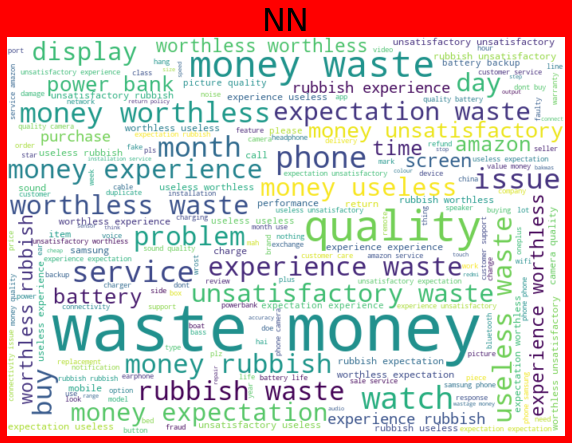

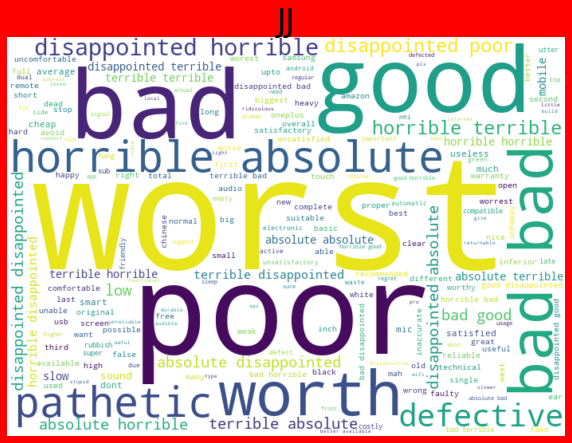

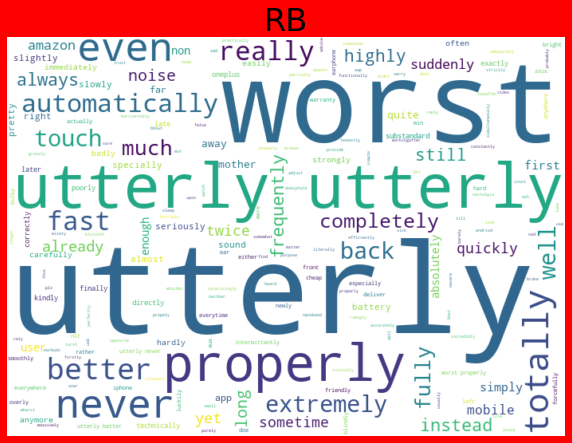

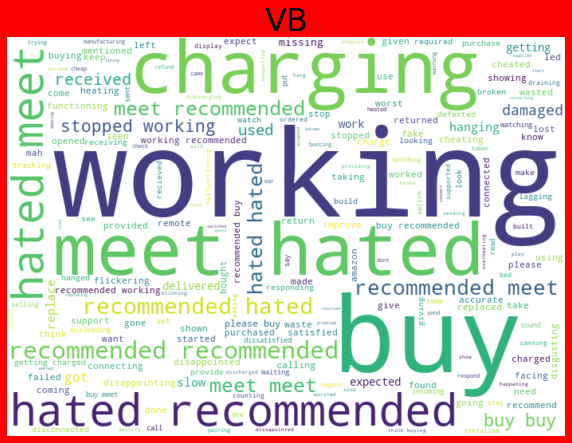

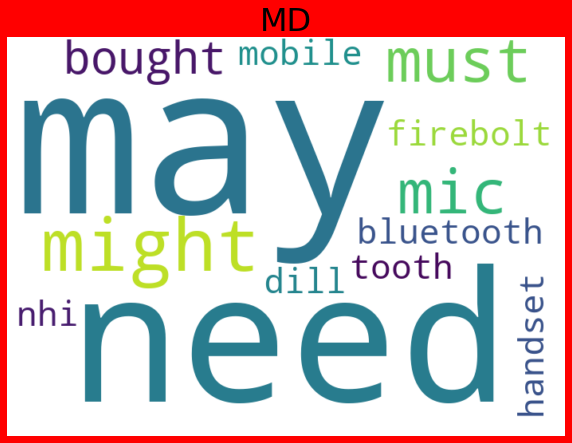

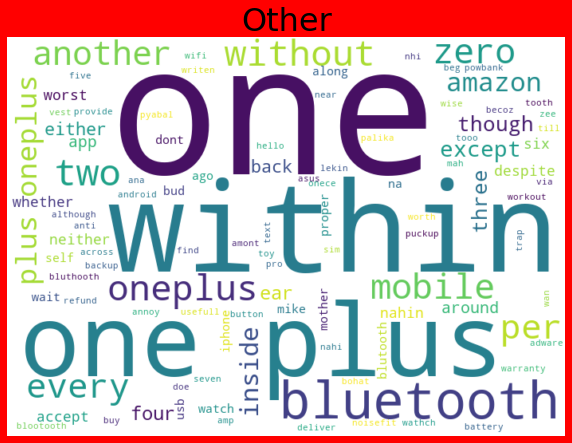

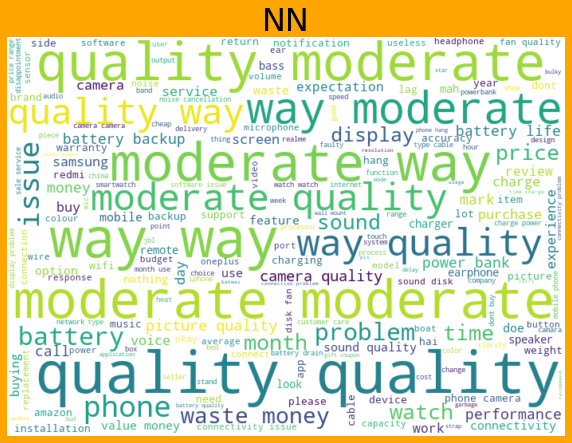

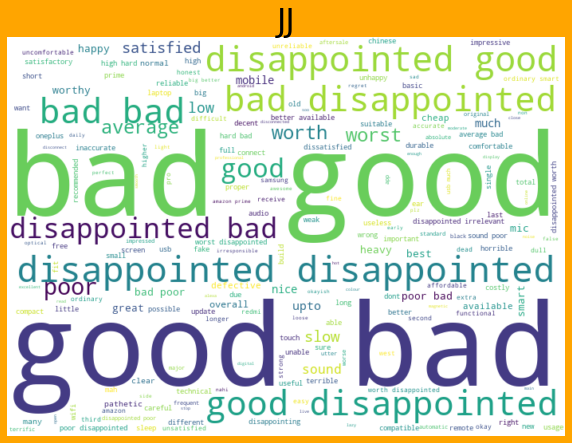

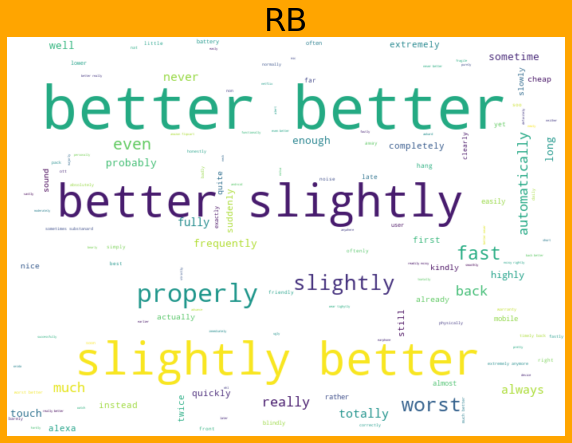

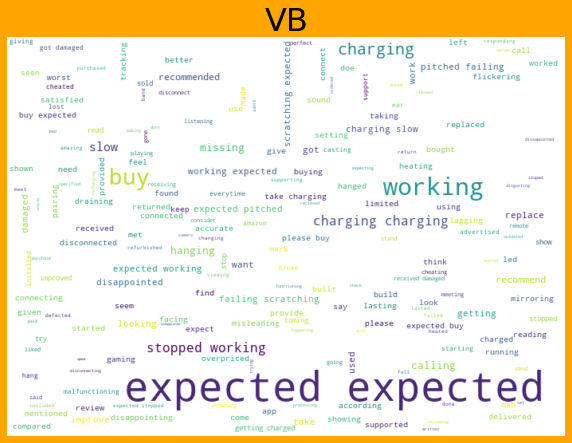

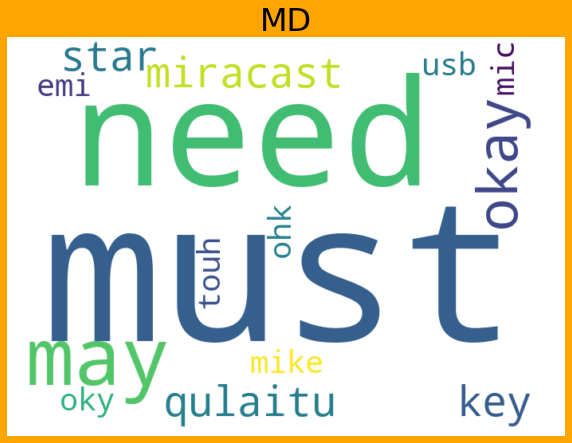

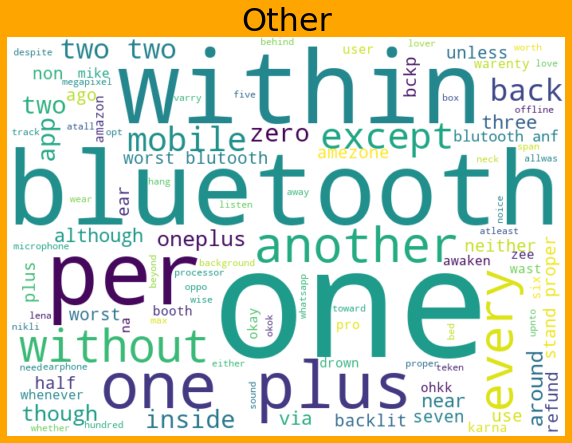

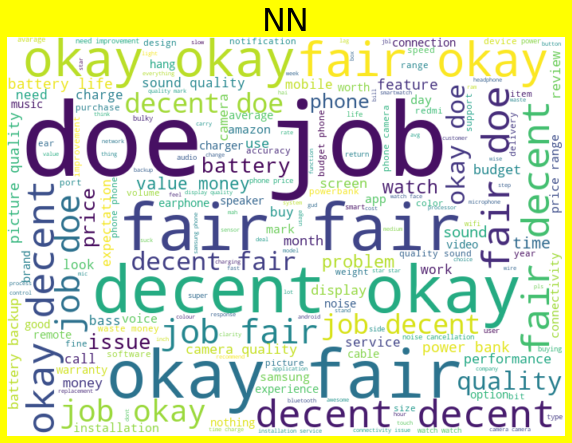

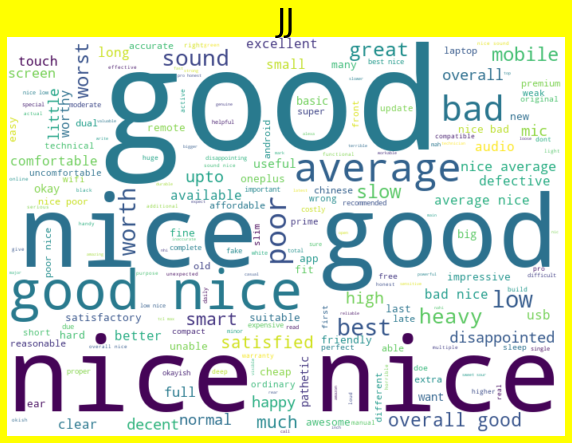

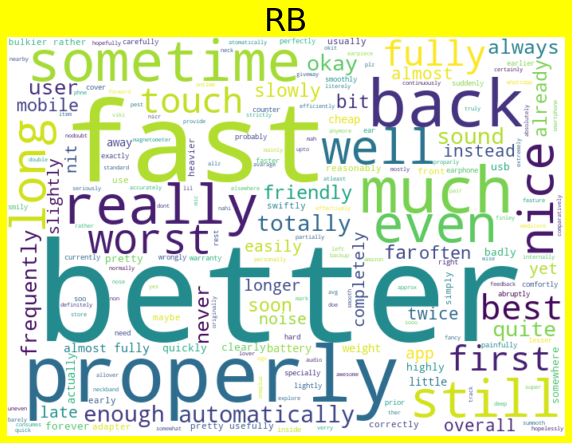

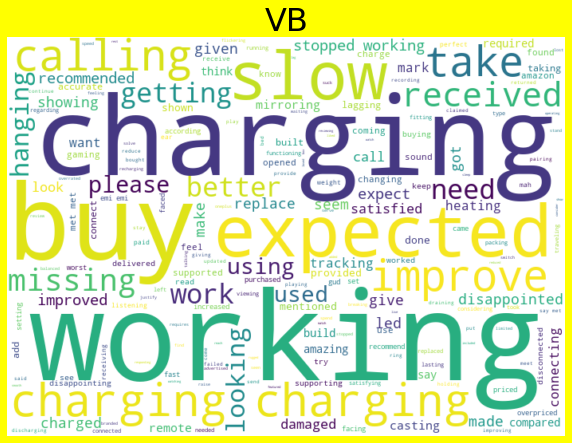

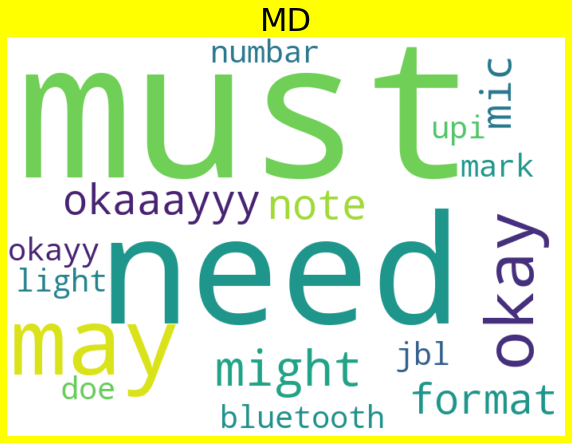

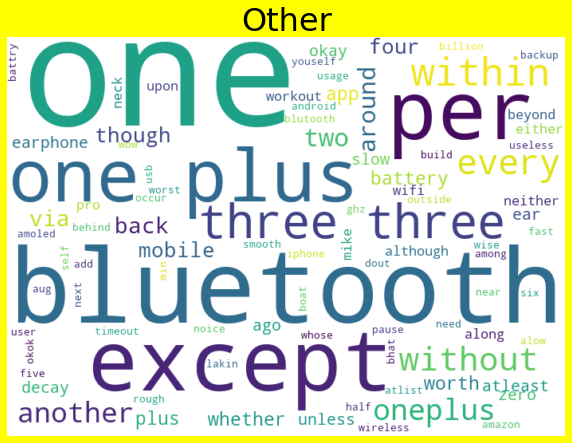

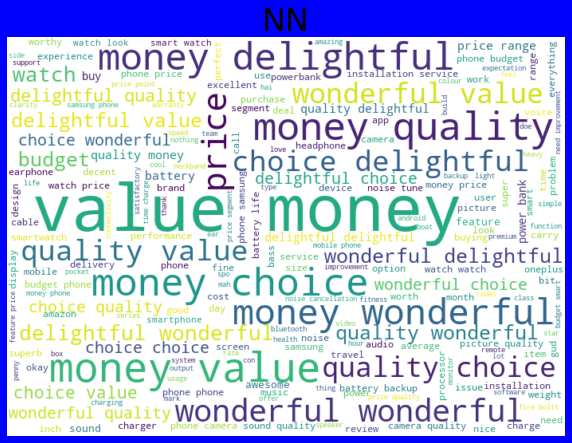

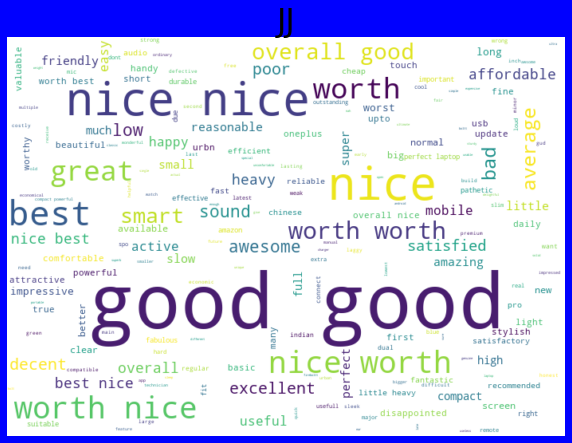

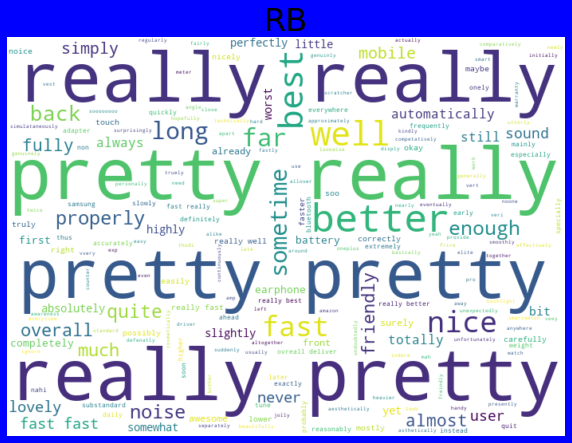

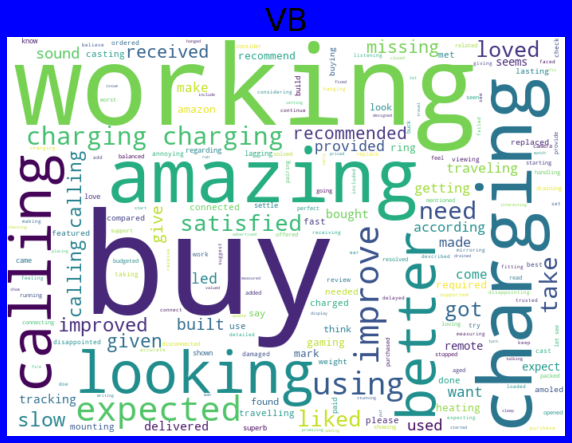

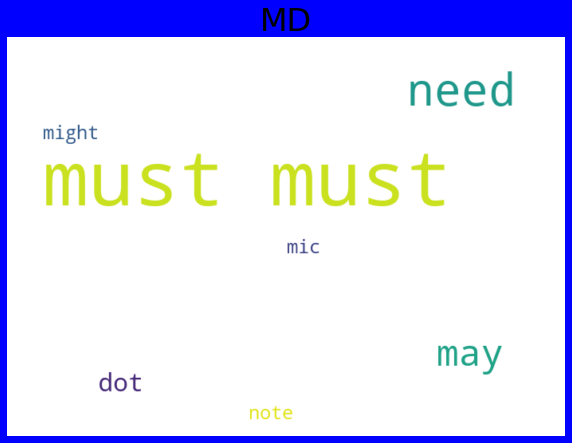

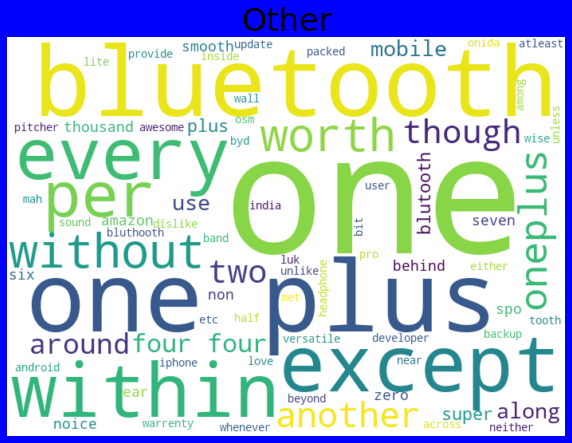

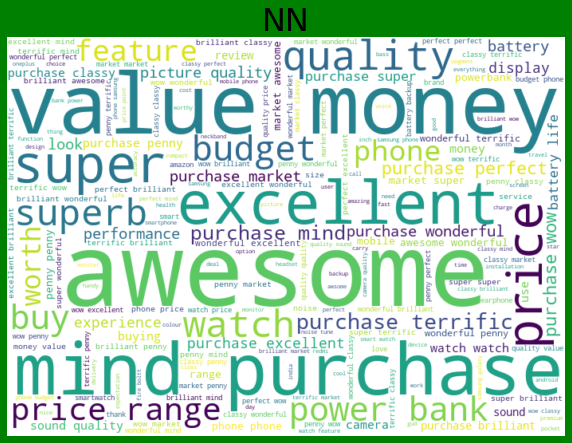

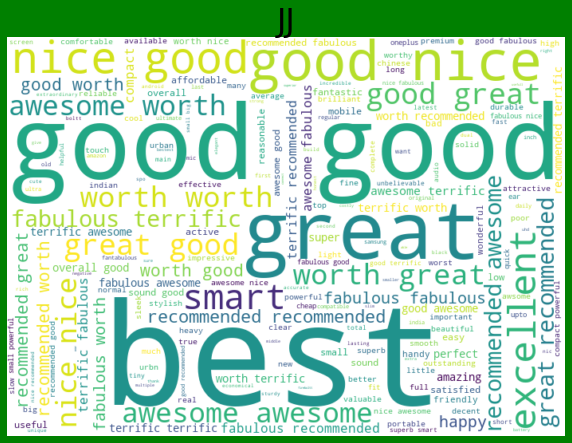

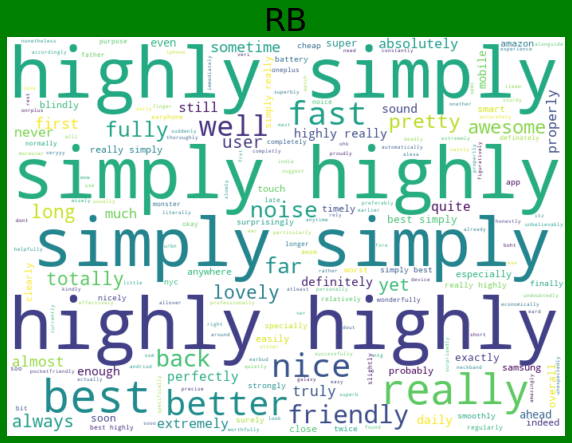

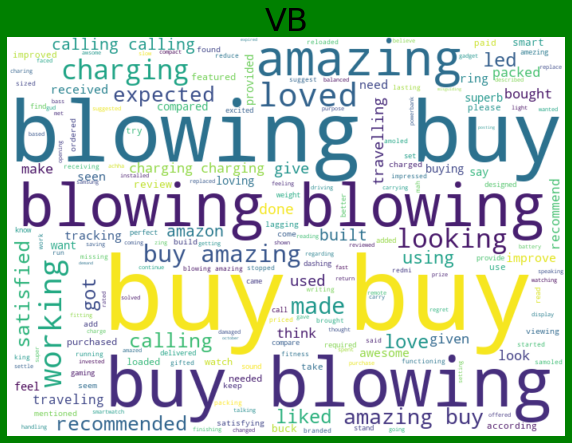

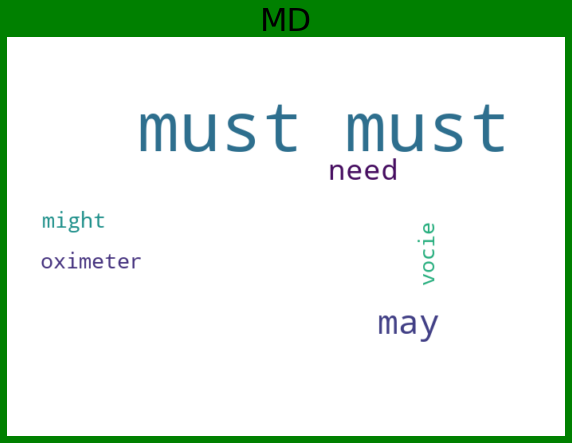

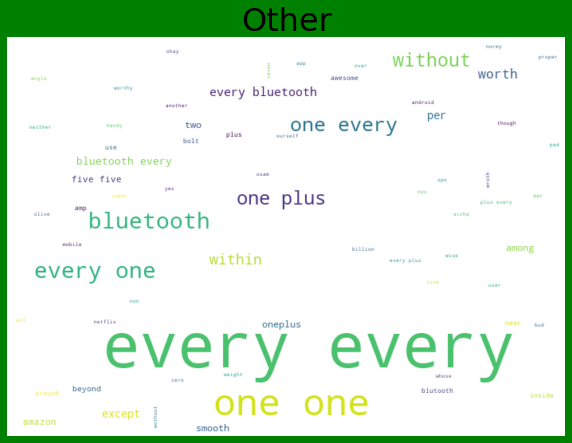

In [12]:
for j in range(len(dat)):
    for i in listy:
        plt.figure(figsize = (10,8),facecolor=dicty[j+1])
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat[j][i]))
        plt.imshow(wordC, interpolation='bilinear')
        plt.title(i, fontsize = 32)
        plt.axis("off")
        plt.show()

In [13]:
data['text']=0
for i in range(len(data)):
    data['text'].iloc[i]=" ".join([data['NN'].iloc[i],data['JJ'].iloc[i],data['RB'].iloc[i],data['VB'].iloc[i],
                                   data['MD'].iloc[i]])
data

comments  rating             NN           JJ  \
0                   terrific purchase       5       purchase     terrific   
1                  highly recommended       5                 recommended   
2                                 wow       5            wow                
3                   worth every penny       5          penny        worth   
4                            must buy       5                               
...                               ...     ...            ...          ...   
124979             selfie camera poor       1  selfie camera         poor   
124980                   review month       1   review month                
124981  charger usb cable not working       1  charger cable                
124982           disoppointed quality       1        quality                
124983                 bad experience       1     experience          bad   

            RB            VB    MD  Other                         text  
0                                                 purchase terrific     
1       highly                                    recommended highly    
2                                                              wow      
3                                   every               penny worth     
4                        buy  must                            buy must  
...        ...           ...   ...    ...                          ...  
124979                                           selfie camera poor     
124980                                                review month      
124981     not       working          usb  charger cable  not working   
124982          disoppointed                   quality   disoppointed   
124983                                               experience bad     

[124984 rows x 9 columns]

In [14]:
data.to_csv('final_data.csv',index=False)